# Data Science in Earth Observation - Segmentation



# 1. DynamicEarthNet Challenge



# 2. DynamicEarthNet: Daily Multi-Spectral Satellite Dataset for Semantic Change Segmentation

More details can be found in the original [data set paper](https://openaccess.thecvf.com/content/CVPR2022/papers/Toker_DynamicEarthNet_Daily_Multi-Spectral_Satellite_Dataset_for_Semantic_Change_Segmentation_CVPR_2022_paper.pdf).

```
@inproceedings{toker2022dynamicearthnet,
  title={DynamicEarthNet: Daily Multi-Spectral Satellite Dataset for Semantic Change Segmentation},
  author={Toker, Aysim and Kondmann, Lukas and Weber, Mark and Eisenberger, Marvin and Camero, Andr{\'e}s and Hu, Jingliang and Hoderlein, Ariadna Pregel and {\c{S}}enaras, {\c{C}}a{\u{g}}lar and Davis, Timothy and Cremers, Daniel and others},
  booktitle={Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition},
  pages={21158--21167},
  year={2022}
}

```

In [ ]:
# install the required packages
import sys
!{sys.executable} -m pip install -r requirements.txt

In [126]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(3108)

In [3]:
# this should match the name of the data sets
filename = 'data/dynamic_earth_net.h5'

dataset = h5py.File(filename, 'r')

# show the content names
print(list(dataset.keys()))

['labels_test', 'labels_train', 'planet_test', 'planet_train', 's2_test', 's2_train']


Sentinel-2 shape:  (24, 1024, 1024, 12)


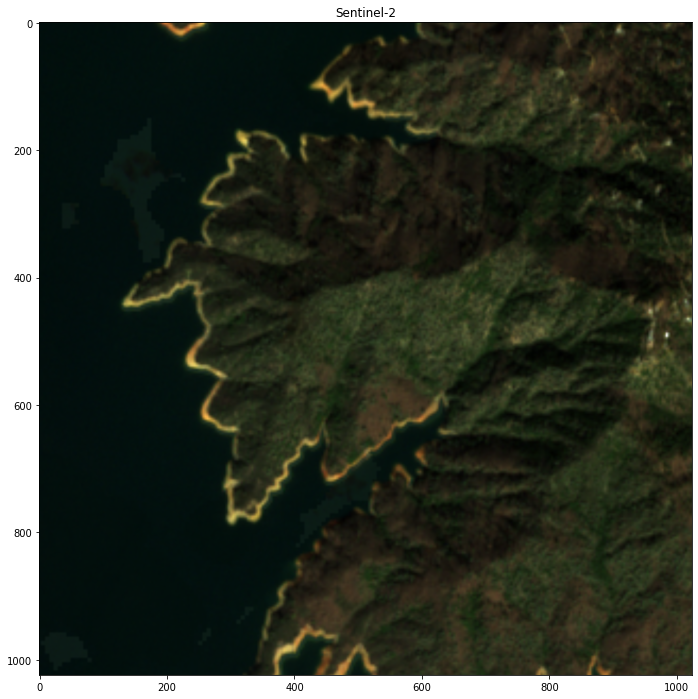

In [76]:
# load Sentinel-2 data
# O'Brien Mountain, California, US. Check it on [Google Maps](https://goo.gl/maps/FwK3my9AX1xZ2Jrs5)
sen2_train = np.array(dataset['s2_train'])

print("Sentinel-2 shape: ", sen2_train.shape)
# 24 samples, 1024x1024 pixels, 12 bands

def true_color(X):
    blue = ((X[:,:,0] - np.min(X[:,:,0])) / (np.max(X[:,:,0]) - np.min(X[:,:,0])))
    green = ((X[:,:,1] - np.min(X[:,:,1])) / (np.max(X[:,:,1]) - np.min(X[:,:,1])))
    red = ((X[:,:,2] - np.min(X[:,:,2])) / (np.max(X[:,:,2]) - np.min(X[:,:,2])))
    return np.dstack((red, green, blue))  

index = 2

fig=plt.figure(figsize=(12, 12))
# B2 = blue, B3 = green, and B4 = red. Note that B1 was not included in the data set
plt.imshow(true_color(sen2_train[index]))
plt.title('Sentinel-2')
plt.show()

Planet Fusion shape:  (24, 1024, 1024, 4)


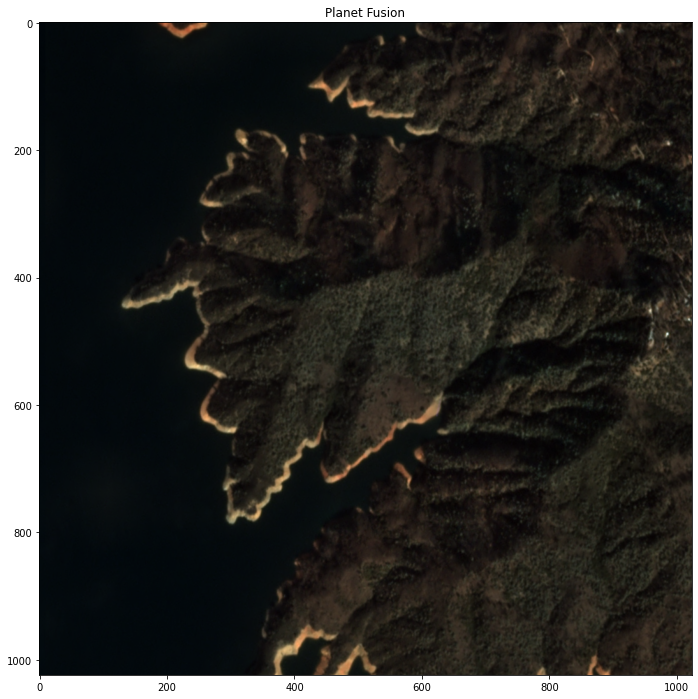

In [68]:
# load Planet Fusion data
planet_train = np.array(dataset['planet_train'])

print("Planet Fusion shape: ", planet_train.shape)
# 24 samples, 1024x1024 pixels, 12 bands

index = 2

fig=plt.figure(figsize=(12, 12))
# B1 = blue, B2 = green, B3 = red, and B4= NIR
plt.imshow(true_color(planet_train[index]))
plt.title('Planet Fusion')
plt.show()

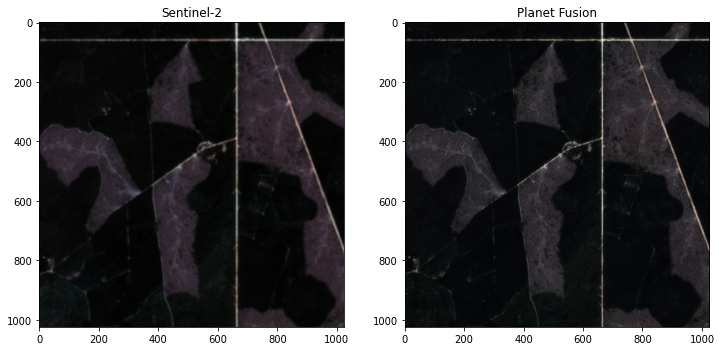

In [75]:
# Ocala area, Florida, US. You can check it on [Google Maps](https://goo.gl/maps/uXmmcdaniRDiQEqA6)
sen2_test = np.array(dataset['s2_test'])
planet_test = np.array(dataset['planet_test'])

fig=plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)
plt.imshow(true_color(sen2_test[index]))
plt.title('Sentinel-2')
fig.add_subplot(1, 2, 2)
plt.imshow(true_color(planet_test[index]))
plt.title('Planet Fusion')
plt.show()

Labels shape:  (24, 1024, 1024, 7)


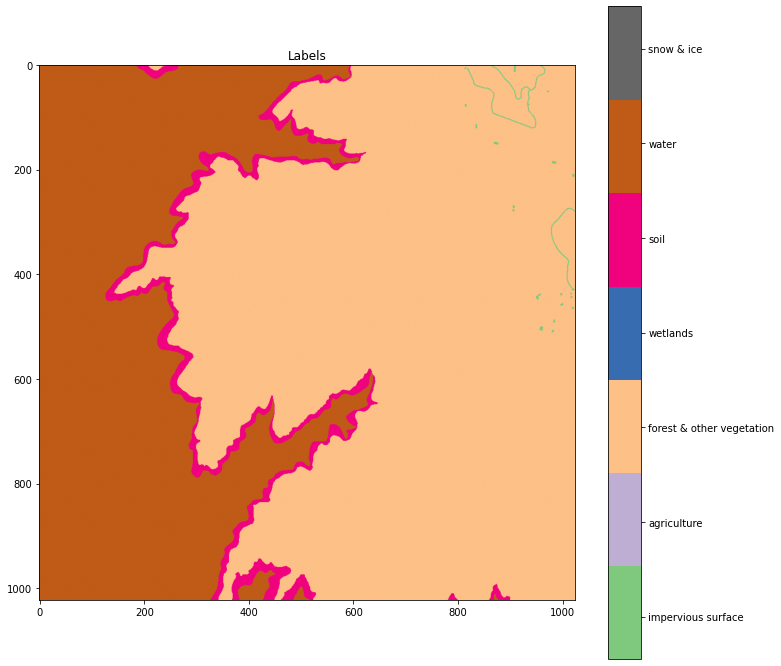

In [144]:
# load Planet Fusion data
labels_train = np.array(dataset['labels_train'])
labels_test = np.array(dataset['labels_test'])

print("Labels shape: ", labels_train.shape)
# 24 samples, 1024x1024 pixels, 12 bands

color_map = cm.get_cmap("Accent", lut=labels_train.shape[-1])
labels=['impervious surface',
       'agriculture',
       'forest & other vegetation',
       'wetlands',
       'soil',
       'water',
       'snow & ice']

def labels2rgb(
    X,
    colors=color_map.colors):
    Z = np.zeros((X.shape[0], X.shape[1], 3))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = colors[np.argmax(X[i,j]), :3]
    return Z

fig=plt.figure(figsize=(12, 12))
plt.imshow(labels2rgb(labels_train[index]), cmap=color_map)
plt.title('Labels')
cbar = plt.colorbar(ticks=np.linspace(1/14, 13/14, 7))
cbar.set_ticklabels(labels)
plt.show()

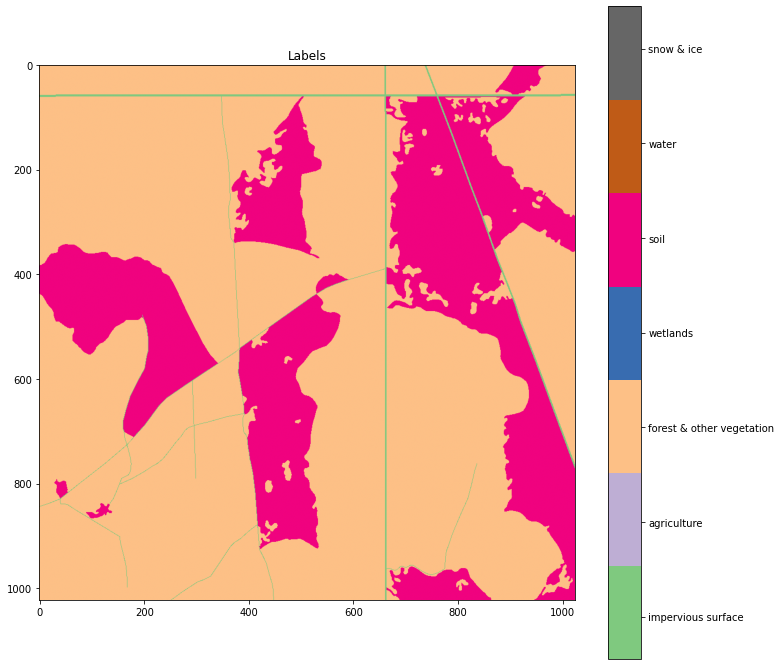

In [145]:
fig=plt.figure(figsize=(12, 12))
plt.imshow(labels2rgb(labels_test[index]), cmap=color_map)
plt.title('Labels')
cbar = plt.colorbar(ticks=np.linspace(1/14, 13/14, 7))
cbar.set_ticklabels(labels)
plt.show()

One key application of our dataset is to measure how a given local region changes over time. For the standard task of binary change detection, we classify each pixel into change or no-change. This definition, however, disregards semantic information. We, therefore, generalize this classical notion to a multi-class segmentation task, which we refer to as semantic change segmentation.

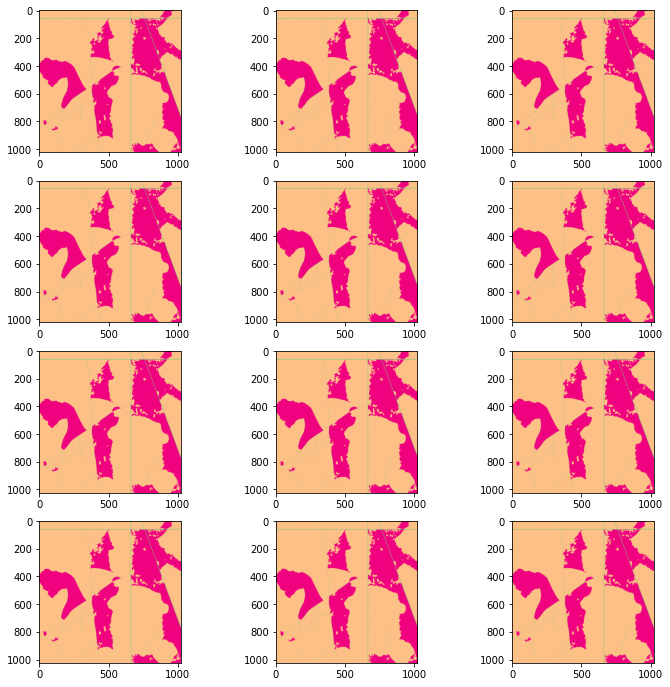

In [151]:
fig=plt.figure(figsize=(12, 12))
#for i in range(labels_test.shape[0]):
for i in range(12):
    fig.add_subplot(4, 3, i+1)
    #plt.imshow(labels2rgb(labels_test[i]), cmap=color_map)
    plt.imshow(Zs[i], cmap=color_map)

plt.show()

In [152]:
Zs = list()
for i in range(labels_train.shape[0]):
    Zs.append(labels2rgb(labels_train[i]))